### (1) 데이터 가져오기
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) `datetime` 컬럼을 `datetime` 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- `to_datetime` 활용 : [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

### (3) `year`, `month`, `day`, `hour`, `minute`, `second` 데이터 개수 시각화하기
- `sns.countplot` 활용해서 시각화하기
- `subplot을` 활용해서 한 번에 6개의 그래프 함께 시각화하기


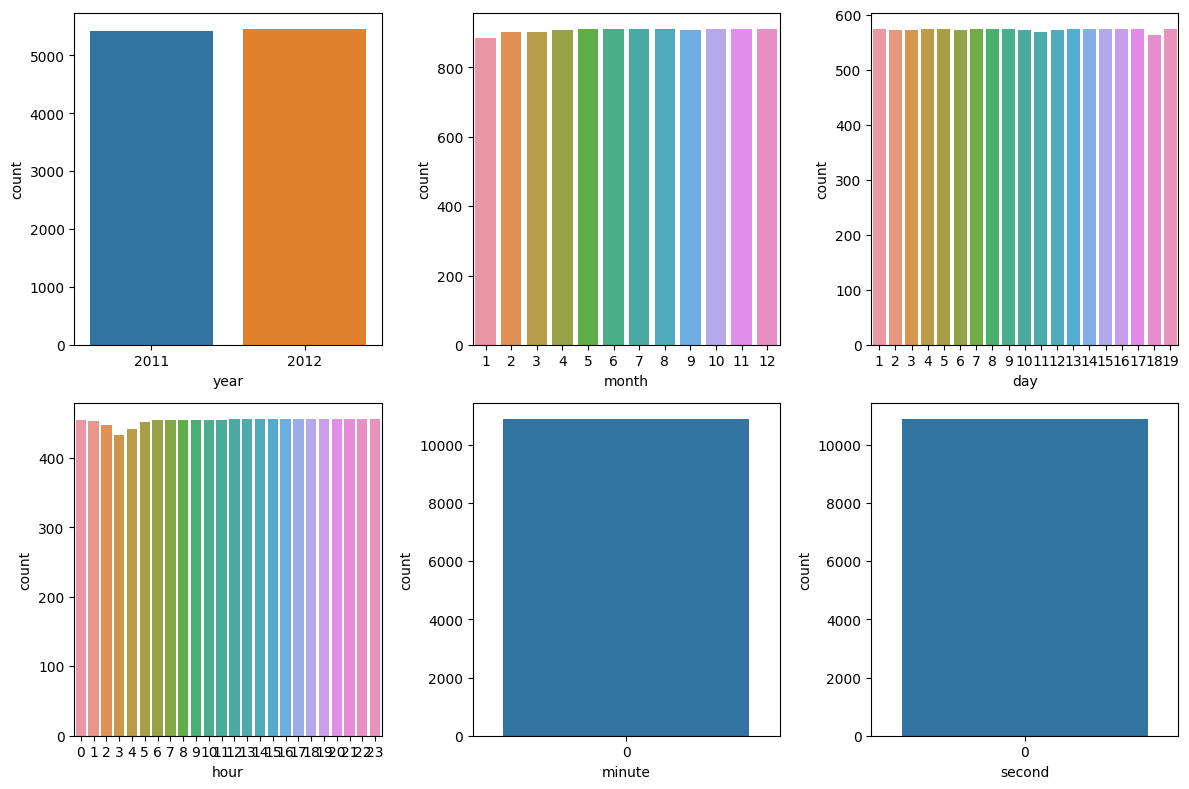

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# subplot 설정
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 연, 월, 일, 시, 분, 초 컬럼 시각화
sns.countplot(data=train, x='year', ax=axes[0, 0])
sns.countplot(data=train, x='month', ax=axes[0, 1])
sns.countplot(data=train, x='day', ax=axes[0, 2])
sns.countplot(data=train, x='hour', ax=axes[1, 0])
sns.countplot(data=train, x='minute', ax=axes[1, 1])
sns.countplot(data=train, x='second', ax=axes[1, 2])

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
- `X`(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) `count를` 예측하는데 `casual`,`registered` 컬럼이 필요할까요?

- `count` 값을 맞추고자 하므로, `y` 변수에 `count` 컬럼의 데이터 넣기

In [4]:
from sklearn.model_selection import train_test_split
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
y = train['count']

train_X, test_X, train_Y, test_Y = train_test_split(train[features], train['count'], test_size=0.2)


### (5) LinearRegression 모델 학습
- `sklearn의` `LinearRegression` 모델 불러오기 및 학습하기

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_X, train_Y)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 `X_test를` 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 `target` 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기


In [6]:
predictions = model.predict(test_X)

In [7]:
from sklearn.metrics import mean_squared_error

mse_error = mean_squared_error(predictions, test_Y)
mse_error ** 0.5

1.0621707416708344e-13

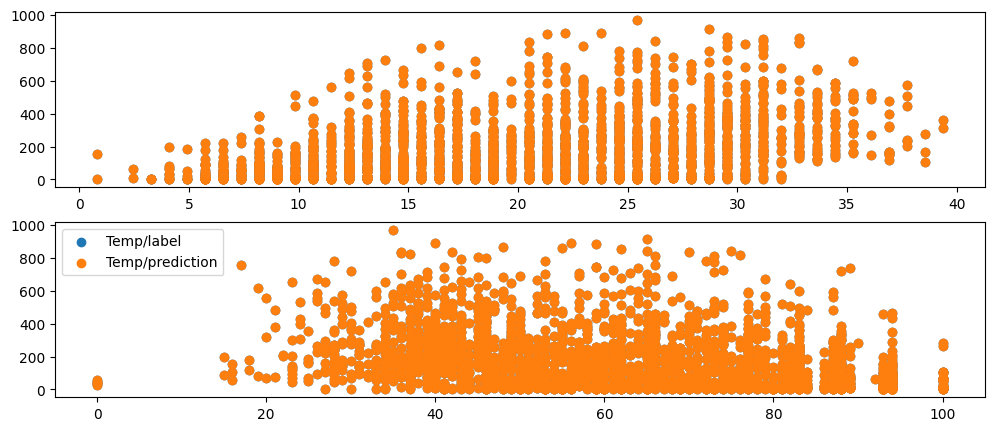

In [10]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 1, figsize=(12, 5))
axes[0].scatter(test_X['temp'], test_Y, label="Temp/label", color='b')
axes[0].scatter(test_X['temp'], predictions, label="Temp/prediction", color='r')
axes[1].scatter(test_X['humidity'], test_Y, label="Temp/label", color='b')
axes[1].scatter(test_X['humidity'], predictions, label="Temp/prediction", color='r')
plt.legend()
plt.show()